In [1]:
### 사용할 라이브러리
# - 데이터 처리 라이브러리
import pandas as pd

# - 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# - 한글 처리
plt.rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

### <통합 데이터 불러들이기>

- 데이터프레임 변수명 : df_bus_card_tot

In [2]:
file_path = './02_data_all/df_bus_card_tot.csv'
df_bus_card_tot = pd.read_csv(file_path)
df_bus_card_tot.head(1)

,승차시각,하차시각,승객연령,승차정류장,하차정류장,버스 내 체류시간(분),기준년도,기준월,기준일,기준시간,기준시간(분)
0,2020-01-02 05:10:49,2020-01-02 05:18:44,일반,양덕차고지,동부초등학교,7.92,2020,1,2,5,10


In [3]:
df_bus_card_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842608 entries, 0 to 842607
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   승차시각          842608 non-null  object 
 1   하차시각          842608 non-null  object 
 2   승객연령          841683 non-null  object 
 3   승차정류장         842608 non-null  object 
 4   하차정류장         842608 non-null  object 
 5   버스 내 체류시간(분)  842608 non-null  float64
 6   기준년도          842608 non-null  int64  
 7   기준월           842608 non-null  int64  
 8   기준일           842608 non-null  int64  
 9   기준시간          842608 non-null  int64  
 10  기준시간(분)       842608 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 70.7+ MB


### <기준월 및 기준일자별 이용량 count 집계하여 -> 히트맵으로 시각화>

- 기준월 및 기준일자별 이용량 count 집계 : 피봇(pivot) 테이블 생성한다는 의미

- 기준월 및 기준일자별 승객연령을 기준으로 count 집계

In [4]:
df_pivot = df_bus_card_tot.pivot_table(index='기준월', # y축
                           columns='기준일',# x축
                           values='승객연령',
                           aggfunc='count')
df_pivot

기준일,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,9365.0,16164.0,16590.0,12530.0,9515.0,15474.0,12981.0,15785.0,16760.0,17495.0,...,17229.0,17399.0,9112.0,5923.0,7770.0,5468.0,14464.0,16034.0,15868.0,16186.0
2,11801.0,8523.0,15830.0,15488.0,14902.0,14376.0,15700.0,11358.0,8316.0,15582.0,...,5654.0,2898.0,5932.0,4469.0,5344.0,5417.0,5488.0,3757.0,NaN,NaN
3,2399.0,6538.0,5691.0,5976.0,5828.0,6150.0,4111.0,2826.0,6879.0,5336.0,...,NaN,NaN,NaN,131.0,2889.0,4976.0,3868.0,1241.0,5143.0,2487.0


In [5]:
### 피봇 결과 내에 결측치(NaN)가 존재한다.
# - 모든 결측치를 0으로 대체한다.

df_pivot=df_pivot.fillna(0)
df_pivot

기준일,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,9365.0,16164.0,16590.0,12530.0,9515.0,15474.0,12981.0,15785.0,16760.0,17495.0,...,17229.0,17399.0,9112.0,5923.0,7770.0,5468.0,14464.0,16034.0,15868.0,16186.0
2,11801.0,8523.0,15830.0,15488.0,14902.0,14376.0,15700.0,11358.0,8316.0,15582.0,...,5654.0,2898.0,5932.0,4469.0,5344.0,5417.0,5488.0,3757.0,0.0,0.0
3,2399.0,6538.0,5691.0,5976.0,5828.0,6150.0,4111.0,2826.0,6879.0,5336.0,...,0.0,0.0,0.0,131.0,2889.0,4976.0,3868.0,1241.0,5143.0,2487.0


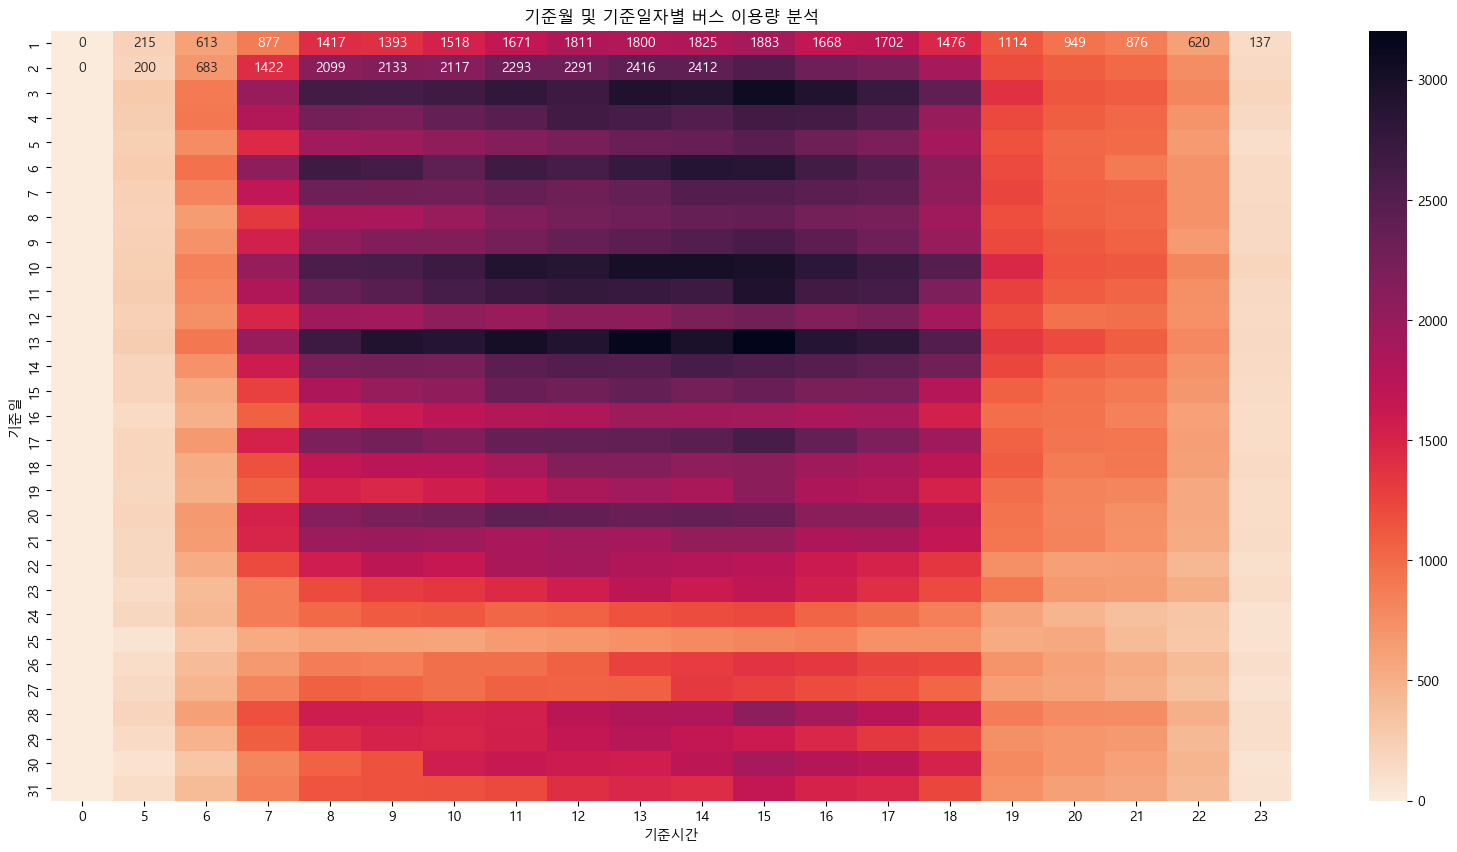

In [10]:
### 기준월 및 기준일자별 이용량 현황 ->히트맵(heatmap) 시각화하기
plt.figure(figsize=(20,10))
plt.title('기준월 및 기준일자별 버스 이용량 분석')

# - annot = True : 집계값을 보여줄지 말지 결정(True 보여주기)
# - fmt = '.0f' : 집계값을 소수점 없이 보여주기
# - cmap = 'rocket_r' : 색상맵(붉은 계열의 흰색~검은색), 검은색은 데이터가 큰값, 옅어질수록 데이터가 작은 값
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.show()

#### 해석

- 현재 수집된 데이터는 1월~3월 데이터로 1월에 대중교통인 버스 이용객이 많은 것으로 보인다.

- 다만, 포항은 국내 유명 여행지가 많다는 특수성이 있는 지역이므로, 겨울철에 대중교통을 이용한 여행객들의 유입도 향후 고려하여 분석할 필요성은 있다.

- 2월 말일과, 3월 중순경에는 결측치가 많이 존재하기에 ->해당 주제(기준월 및 일자별 이용량 분석)를 해석하기에는 다소 어려움이 있음

In [7]:
### <기준일 및 기준시간별 이용량 count 집계하여 -> 히트맵으로 시각화>

#- 기준일 및 기준식간별간 이용량 count 집계 : 피봇(pivot) 테이블 생성한다는 의미

#- 기준일 및 기준식간별간 승객연령을 기준으로 count 집계
df_pivot = df_bus_card_tot.pivot_table(index='기준일', # y축
                           columns='기준시간',# x축
                           values='승객연령',
                           aggfunc='count')
df_pivot=df_pivot.fillna(0)
df_pivot

기준시간,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
기준일,,,,,,,,,,,,,,,,,,,,
1,0.0,215.0,613.0,877.0,1417.0,1393.0,1518.0,1671.0,1811.0,1800.0,1825.0,1883.0,1668.0,1702.0,1476.0,1114.0,949.0,876.0,620.0,137.0
2,0.0,200.0,683.0,1422.0,2099.0,2133.0,2117.0,2293.0,2291.0,2416.0,2412.0,2532.0,2293.0,2240.0,1888.0,1201.0,1083.0,1009.0,762.0,151.0
3,0.0,281.0,890.0,1987.0,2629.0,2626.0,2668.0,2783.0,2694.0,2933.0,2903.0,3084.0,2918.0,2722.0,2404.0,1388.0,1130.0,1091.0,802.0,178.0
4,0.0,259.0,906.0,1799.0,2245.0,2222.0,2366.0,2460.0,2643.0,2602.0,2517.0,2643.0,2633.0,2511.0,1995.0,1224.0,1086.0,1014.0,712.0,157.0
5,0.0,240.0,759.0,1440.0,1919.0,1959.0,2046.0,2138.0,2237.0,2337.0,2357.0,2454.0,2308.0,2212.0,1893.0,1162.0,1026.0,997.0,654.0,107.0
6,0.0,272.0,959.0,2057.0,2676.0,2619.0,2423.0,2673.0,2606.0,2746.0,2890.0,2860.0,2639.0,2498.0,2071.0,1211.0,1034.0,901.0,719.0,146.0
7,0.0,234.0,823.0,1684.0,2294.0,2315.0,2281.0,2369.0,2310.0,2371.0,2507.0,2508.0,2444.0,2407.0,2049.0,1245.0,1054.0,1031.0,724.0,142.0
8,0.0,213.0,643.0,1334.0,1851.0,1875.0,1980.0,2174.0,2253.0,2296.0,2359.0,2389.0,2265.0,2236.0,1942.0,1186.0,1073.0,1026.0,722.0,152.0
9,0.0,234.0,718.0,1534.0,2042.0,2161.0,2161.0,2249.0,2365.0,2439.0,2517.0,2599.0,2432.0,2297.0,2000.0,1219.0,1116.0,1053.0,662.0,157.0


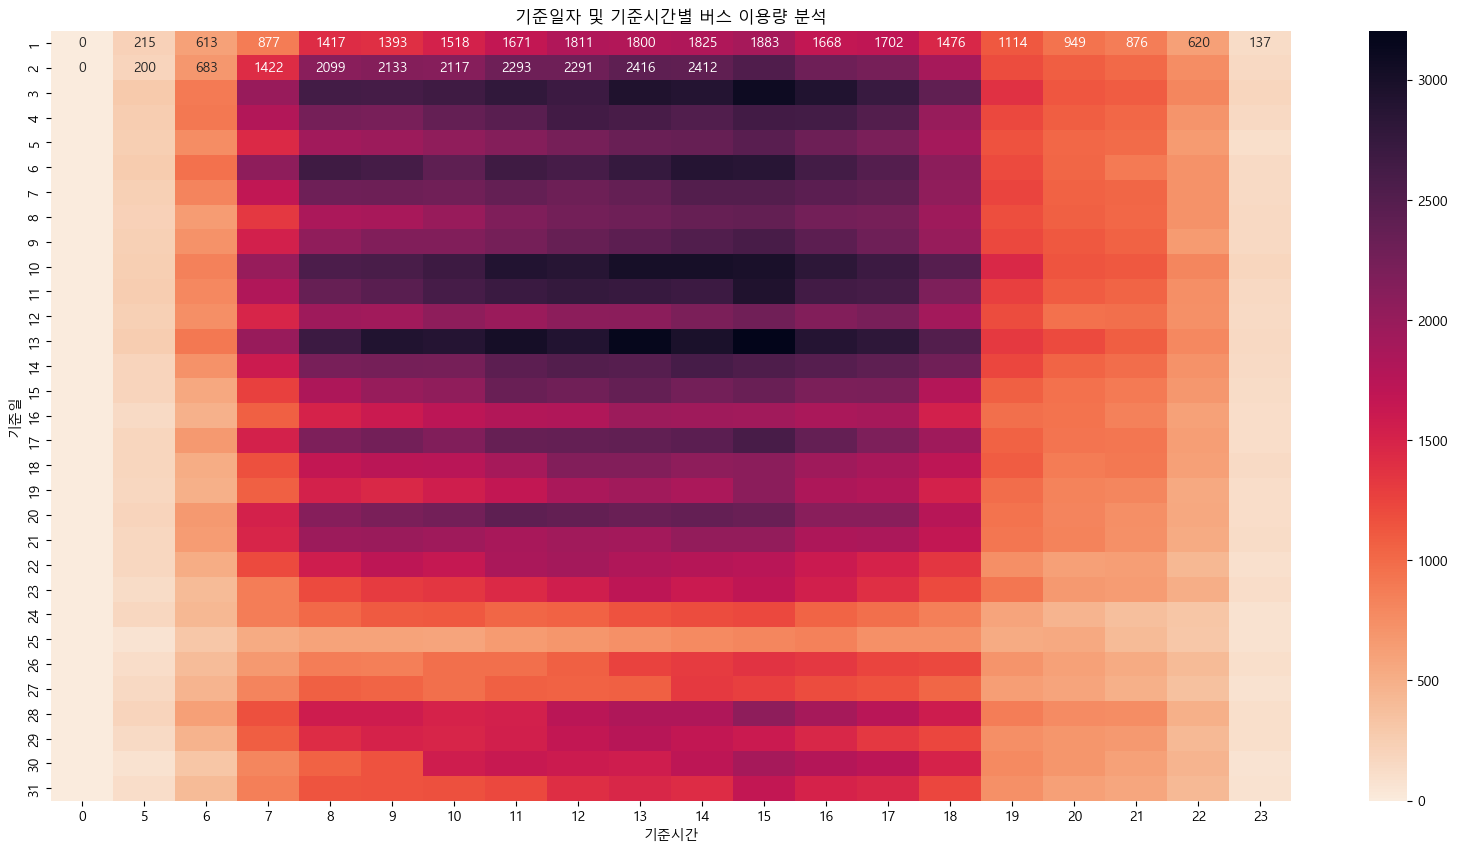

In [13]:
### 기준일 및 기준시간대별 이용량 현황 ->히트맵(heatmap) 시각화하기
plt.figure(figsize=(20,10))
plt.title('기준일자 및 기준시간별 버스 이용량 분석')

# - annot = True : 집계값을 보여줄지 말지 결정(True 보여주기)
# - fmt = '.0f' : 집계값을 소수점 없이 보여주기
# - cmap = 'rocket_r' : 색상맵(붉은 계열의 흰색~검은색), 검은색은 데이터가 큰값, 옅어질수록 데이터가 작은 값
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.show()

#### 해석

- 일자 및 시간대별 이용량을 분석한 결과, 매월 초순 ~ 중순 경에 이용량이 많은 것으로 분석된다.

- 오전 11시 ~ 오후 3시 사이에 많은 이용량을 보이고 있다

- 가장 많은 이용량을 나타내는 시간은 오후 1시로 분석된다.

- 보통 수도권의 경우에는 오전 오후 출/퇴근 시간대에 많은 이용량을 나타내는 반면, 포항 지역의 경우에는 오후 시간에 집중되는 현상을 보이고 있다.

- 이에 대한 현상은 포항 지역의 연령대별 인구 현황을 통해 오후 시간에 이동량이 많을 것으로 여겨지는, 연령대 및 성별을 확인해 볼 필요성은 있다.

- 또한, 관광객들의 시간대별 유입량을 확인하여 분석할 필요성도 있다.

In [14]:
### <기준시간 및 기준시간(분)별 이용량 count 집계하여 -> 히트맵으로 시각화>

#- 기준시간 및 기준시간(분)별간 이용량 count 집계 : 피봇(pivot) 테이블 생성한다는 의미

#- 기준시간 및 기준시간(분)별간 승객연령을 기준으로 count 집계
df_pivot = df_bus_card_tot.pivot_table(index='기준시간', # y축
                           columns='기준시간(분)',# x축
                           values='승객연령',
                           aggfunc='count')
df_pivot=df_pivot.fillna(0)
df_pivot

기준시간(분),0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
기준시간,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,167.0,245.0,194.0,200.0,193.0,250.0,189.0,235.0,259.0,243.0
6,248.0,237.0,186.0,211.0,252.0,244.0,214.0,255.0,232.0,354.0,...,399.0,452.0,413.0,349.0,398.0,373.0,400.0,387.0,454.0,434.0
7,434.0,387.0,390.0,421.0,370.0,451.0,429.0,481.0,593.0,480.0,...,906.0,939.0,856.0,807.0,747.0,774.0,860.0,1106.0,891.0,1159.0
8,1038.0,871.0,1007.0,1025.0,810.0,1122.0,863.0,819.0,800.0,912.0,...,905.0,811.0,828.0,974.0,992.0,904.0,1006.0,1059.0,931.0,1022.0
9,1128.0,1114.0,1118.0,973.0,1024.0,1103.0,831.0,949.0,923.0,850.0,...,1093.0,899.0,956.0,819.0,753.0,873.0,789.0,823.0,998.0,837.0
10,878.0,805.0,916.0,890.0,827.0,1006.0,927.0,968.0,1041.0,858.0,...,1183.0,987.0,887.0,1137.0,880.0,946.0,1058.0,1038.0,1139.0,1133.0
11,898.0,1130.0,1059.0,870.0,1142.0,1078.0,1033.0,1097.0,1001.0,1034.0,...,1052.0,870.0,1018.0,1019.0,907.0,1280.0,1210.0,1110.0,1159.0,1015.0
12,980.0,1028.0,1065.0,1154.0,1094.0,1129.0,1165.0,1116.0,1192.0,1046.0,...,994.0,1006.0,962.0,964.0,900.0,972.0,1132.0,959.0,900.0,1204.0


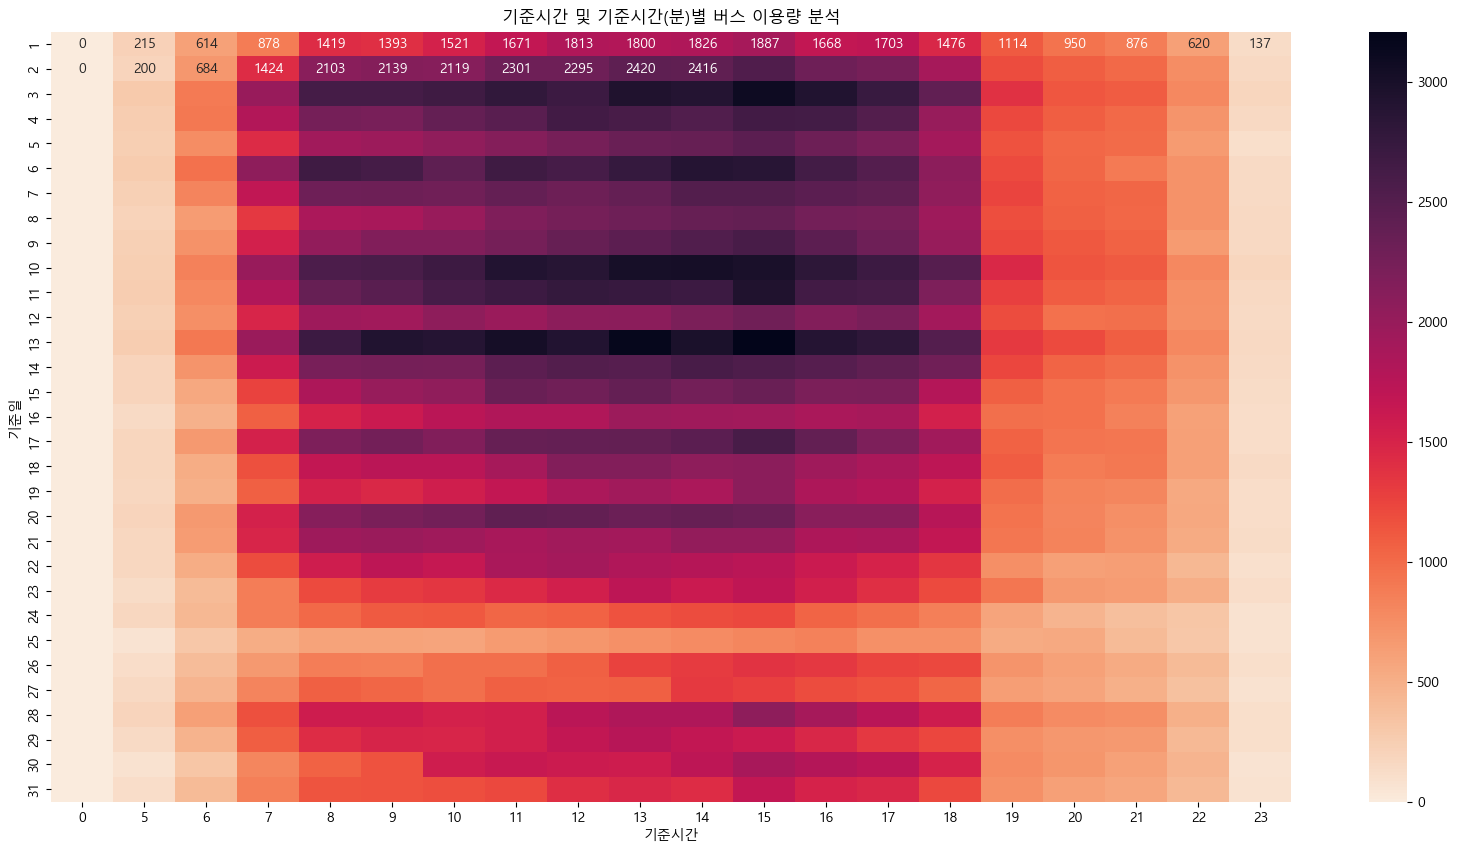

In [20]:
### 기준시간 및 기준시간별 이용량 현황 ->히트맵(heatmap) 시각화하기
plt.figure(figsize=(20,10))
plt.title('기준시간 및 기준시간(분)별 버스 이용량 분석')

# - annot = True : 집계값을 보여줄지 말지 결정(True 보여주기)
# - fmt = '.0f' : 집계값을 소수점 없이 보여주기
# - cmap = 'rocket_r' : 색상맵(붉은 계열의 흰색~검은색), 검은색은 데이터가 큰값, 옅어질수록 데이터가 작은 값
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.show()

#### 해석

- 출근 시간은 7시 56분을 시작으로 이용량이 크게 발생하고 있으며, 퇴근 시간의 경우에는 18시 4~19분 사이에 이용량이 크게 증가하는 것으로 분석된다

- 이용량이 가장 많았던 15시대의 경우에는 15시~ 15시 20분 사이에 매우 많은 이용자가 집중되어 있는 것으로 분석된다.

### <버스내 체류시간 현황 분석>

- 기준일 및 시간대별 버스내 체류시간(분) 현황 분석

In [22]:
df_pivot = df_bus_card_tot.pivot_table(index='기준일', # y축
                           columns='기준시간',# x축
                           values='버스 내 체류시간(분)',
                           aggfunc='mean')
df_pivot=df_pivot.fillna(0)
df_pivot

기준시간,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
기준일,,,,,,,,,,,,,,,,,,,,
1,0.00,20.185488,15.065700,15.542460,17.735285,16.823798,17.770270,17.940174,17.522978,18.783028,18.642399,18.748500,17.976289,17.076688,15.824397,14.739991,14.340558,12.968573,12.927661,10.141241
2,0.00,15.265850,14.806974,15.979958,16.862839,16.617578,16.623285,16.619018,16.783098,17.119194,17.020257,16.526872,16.687667,17.859095,16.110768,14.766509,14.066535,13.385391,11.963045,9.550331
3,0.00,16.207616,16.102444,16.932923,17.779202,17.446342,17.217125,17.451306,17.225996,17.306934,17.317991,16.733738,15.876396,17.920374,16.874102,14.690231,13.772204,13.148286,12.715960,10.486348
4,0.00,16.856873,15.818779,16.329389,17.746591,17.578763,17.172979,17.223062,17.060355,17.364541,17.239988,17.255308,16.513688,17.664968,16.110601,15.407928,14.028749,13.337576,12.701980,10.312930
5,0.00,15.020792,15.184869,16.311103,16.981384,16.968996,16.862902,17.016486,16.790928,17.006869,16.596275,16.545953,16.024344,17.280948,16.423624,14.759871,13.949883,12.823621,12.274755,10.590374
6,0.00,15.837279,15.621500,17.124198,17.427161,17.365252,16.863744,16.746780,16.725645,17.474210,17.305755,16.866636,16.390833,18.139636,16.341516,14.465326,14.197360,12.977658,12.108373,9.706781
7,0.00,16.690043,16.107964,16.740012,16.964828,16.890958,17.141667,17.462651,16.990000,17.229292,17.255265,16.335514,16.064350,17.369103,16.122753,14.418732,13.542116,13.354229,13.003338,9.817887
8,0.00,16.505822,14.502873,16.866954,16.898657,17.260075,17.513306,17.314172,17.258112,17.255776,17.269801,16.812588,17.077971,17.741996,16.342676,14.700422,13.597763,13.382963,12.256994,9.280789
9,0.00,16.434894,16.030709,16.606998,16.923098,17.546969,17.367429,16.930546,17.193934,16.860544,17.363075,17.003951,16.776502,18.089904,16.345227,14.426300,14.180609,13.247607,12.588429,10.177771


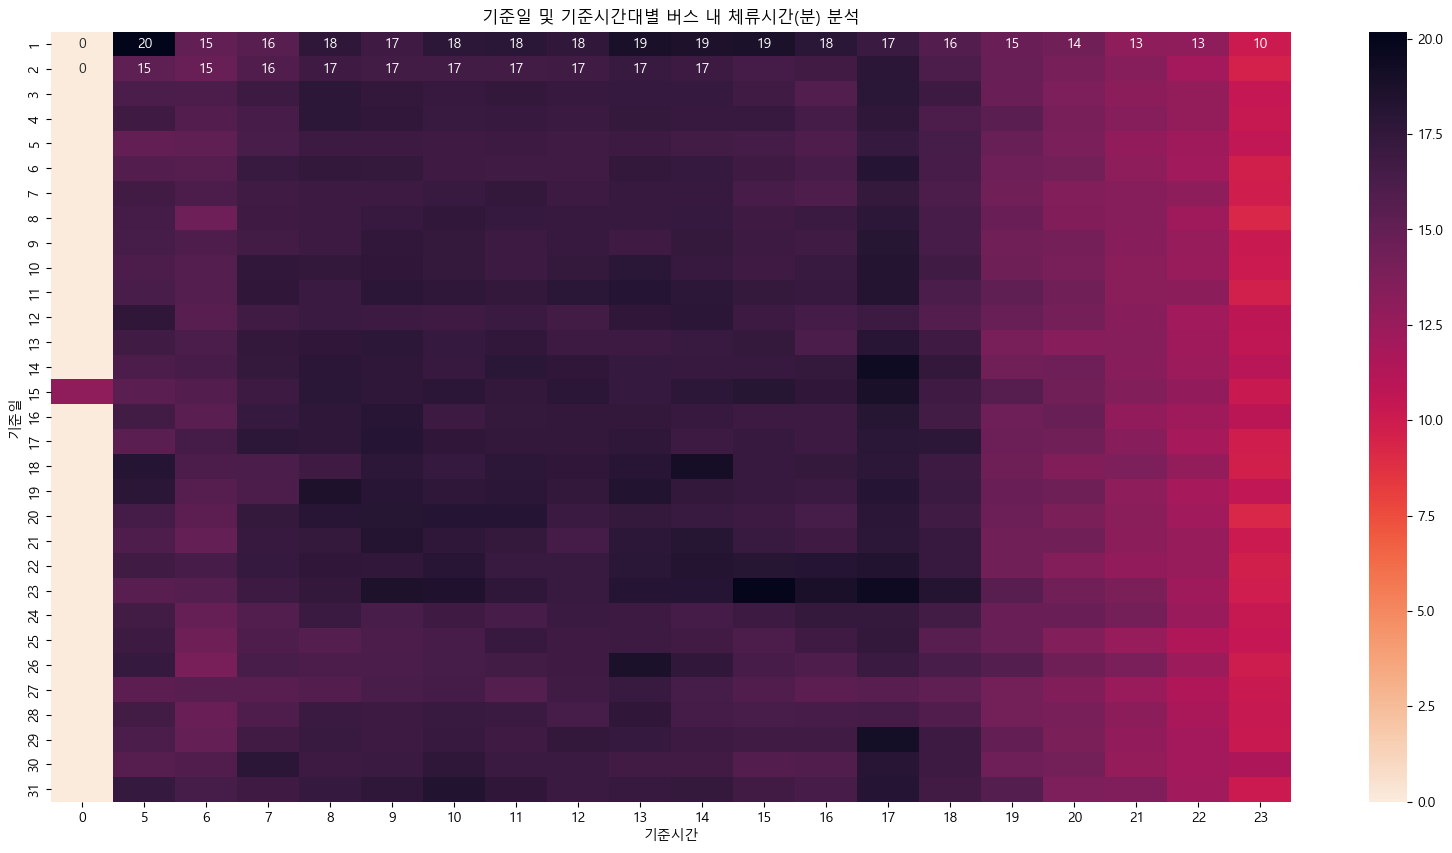

In [23]:
### 기준일 및 기준시간대별 이용량 현황 ->히트맵(heatmap) 시각화하기
plt.figure(figsize=(20,10))
plt.title('기준일 및 기준시간대별 버스 내 체류시간(분) 분석')

# - annot = True : 집계값을 보여줄지 말지 결정(True 보여주기)
# - fmt = '.0f' : 집계값을 소수점 없이 보여주기
# - cmap = 'rocket_r' : 색상맵(붉은 계열의 흰색~검은색), 검은색은 데이터가 큰값, 옅어질수록 데이터가 작은 값
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.show()

#### 해석

- 매월 1일 및 매일 오후 5시에 체류시간이 많이 발생하는 것으로 분석된다

### <시간대별 승객연령별 버스 내 체류시간(분) 현황 분석>

In [25]:
### 시각화를 위해 데이터 추출하여 데이터 프레임으로 생성하기
df_temp = pd.DataFrame()
df_temp['기준시간'] = df_bus_card_tot['기준시간']
df_temp['승객구분'] = df_bus_card_tot['승객연령']
df_temp['버스 내 체류시간(분)'] = df_bus_card_tot['버스 내 체류시간(분)']

df_temp

,기준시간,승객구분,버스 내 체류시간(분)
0,5,일반,7.92
1,5,일반,32.18
2,5,일반,3.68
3,5,일반,34.48
4,5,일반,4.48
...,...,...,...
842603,23,일반,5.07
842604,23,일반,4.05
842605,23,일반,7.67
842606,23,일반,11.35


In [29]:
### 승객 구분에 대한 범주 확인하기
print(df_temp['승객구분'].unique())

### 각 승객구분별 count값 확인하기
df_temp['승객구분'].value_counts()

['일반' '청소년' nan '어린이']


승객구분
일반     772599
청소년     59037
어린이     10047
Name: count, dtype: int64

### 시간대별 승객구분별 버스 내 체류시간(분)에 대한 현황 분석

- 히트맵 시각화는 -> 피봇테이블로 데이터 생성하면 편리함(범주 간 비교 시)

- 일반 막대 또는 선 그래프와 같은 시각화 시에는 -> groupby 함수를 사용하는 것이 편리함(범주 간 비교 시)

In [36]:
### 시간대별 승객구분별 버스 내 체류시간(분)에 대한 데이터 생성

df_temp2=df_temp.groupby(['기준시간','승객구분']).sum()
df_temp2=(df_temp.groupby(['기준시간','승객구분'],as_index=False).sum()).sort_values(by=["버스 내 체류시간(분)"],ascending=False)
df_temp2.head(100)

,기준시간,승객구분,버스 내 체류시간(분)
32,15,일반,1056674.44
29,14,일반,1040204.89
26,13,일반,1031291.25
23,12,일반,983094.10
20,11,일반,981817.91
38,17,일반,975528.48
35,16,일반,951082.64
17,10,일반,942751.68
14,9,일반,938277.61
11,8,일반,910769.28


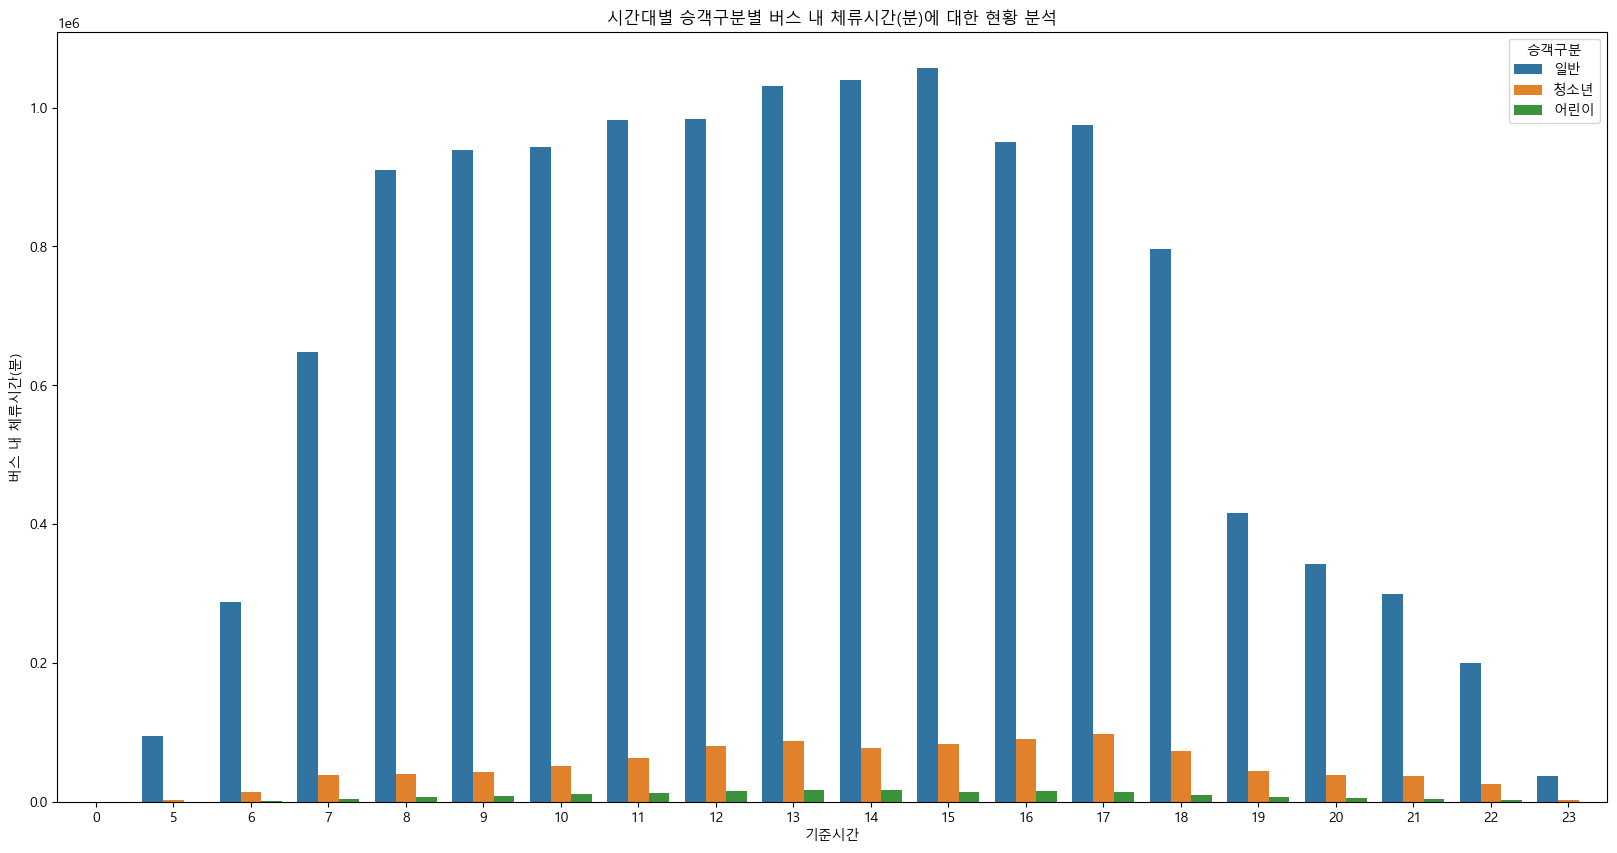

In [38]:
plt.figure(figsize=(20,10))
plt.title('시간대별 승객구분별 버스 내 체류시간(분)에 대한 현황 분석')
sns.barplot(x='기준시간',y='버스 내 체류시간(분)', hue='승객구분', data=df_temp2)
plt.show();

### <승 · 하차정류장별 버스 내 체류시간(분) 상위 30건 분석>

- 승 · 하차정류장 = 승차정류장 ~ 하차정류장

- 구간에 대한 버스 내 체류시간(분)의 합산한 값이 가장 높은 30개 구간 추출

In [61]:
### 새로 데이터프레임 생성한다.
# - 특성명 : 승하차정류장, 버스내 체류시간(분)
# - 데이터프레임명: df_temp
# - 승 · 하차정류장 데이터는 "양덕차고지->동부초등학교" 처럼 데이터를 만들어서 생성하면 된다.

df_temp = pd.DataFrame()
df_temp['승 · 하차정류장'] = df_bus_card_tot['승차정류장'] +'->' +df_bus_card_tot['하차정류장']
df_temp['버스 내 체류시간(분)'] = df_bus_card_tot['버스 내 체류시간(분)']

df_temp

,승 · 하차정류장,버스 내 체류시간(분)
0,양덕차고지->동부초등학교,7.92
1,문덕사거리->새마을금고해도지점,32.18
2,문덕사거리->성우오토모티브,3.68
3,부영사랑3차->오거리,34.48
4,문덕온천->용덕사거리,4.48
...,...,...
842603,법원사거리->농협하나로클럽,5.07
842604,LG빌라입구->대잠중앙하이츠,4.05
842605,대동우방아파트->상대시장,7.67
842606,해병대서문->부영사랑3차,11.35


In [81]:
### 승 · 하차정류장별 버스 내 체류시간(분) 상위 30건 데이터 생성하기
# - 변수명 : df_temp_sel

df_temp_sel=(df_temp.groupby(['승 · 하차정류장'],as_index=False).sum()).sort_values(by=["버스 내 체류시간(분)"],ascending=False).head(30)
df_temp_sel

,승 · 하차정류장,버스 내 체류시간(분)
14059,시외버스터미널->죽도시장,107186.11
27379,흥해환승센터->죽도시장,66116.34
27385,흥해환승센터->중앙상가,48417.60
21204,죽도시장->흥해환승센터,44503.33
13820,시외버스터미널->구룡포환승센터,41560.22
7737,두호초등학교->죽도시장,41363.99
8835,문덕사거리->시외버스터미널,41164.76
2565,구룡포근대화거리->시외버스터미널,40809.91
20194,장성초등학교->죽도시장,39614.05
1444,경북자동차학원->죽도시장,38300.98


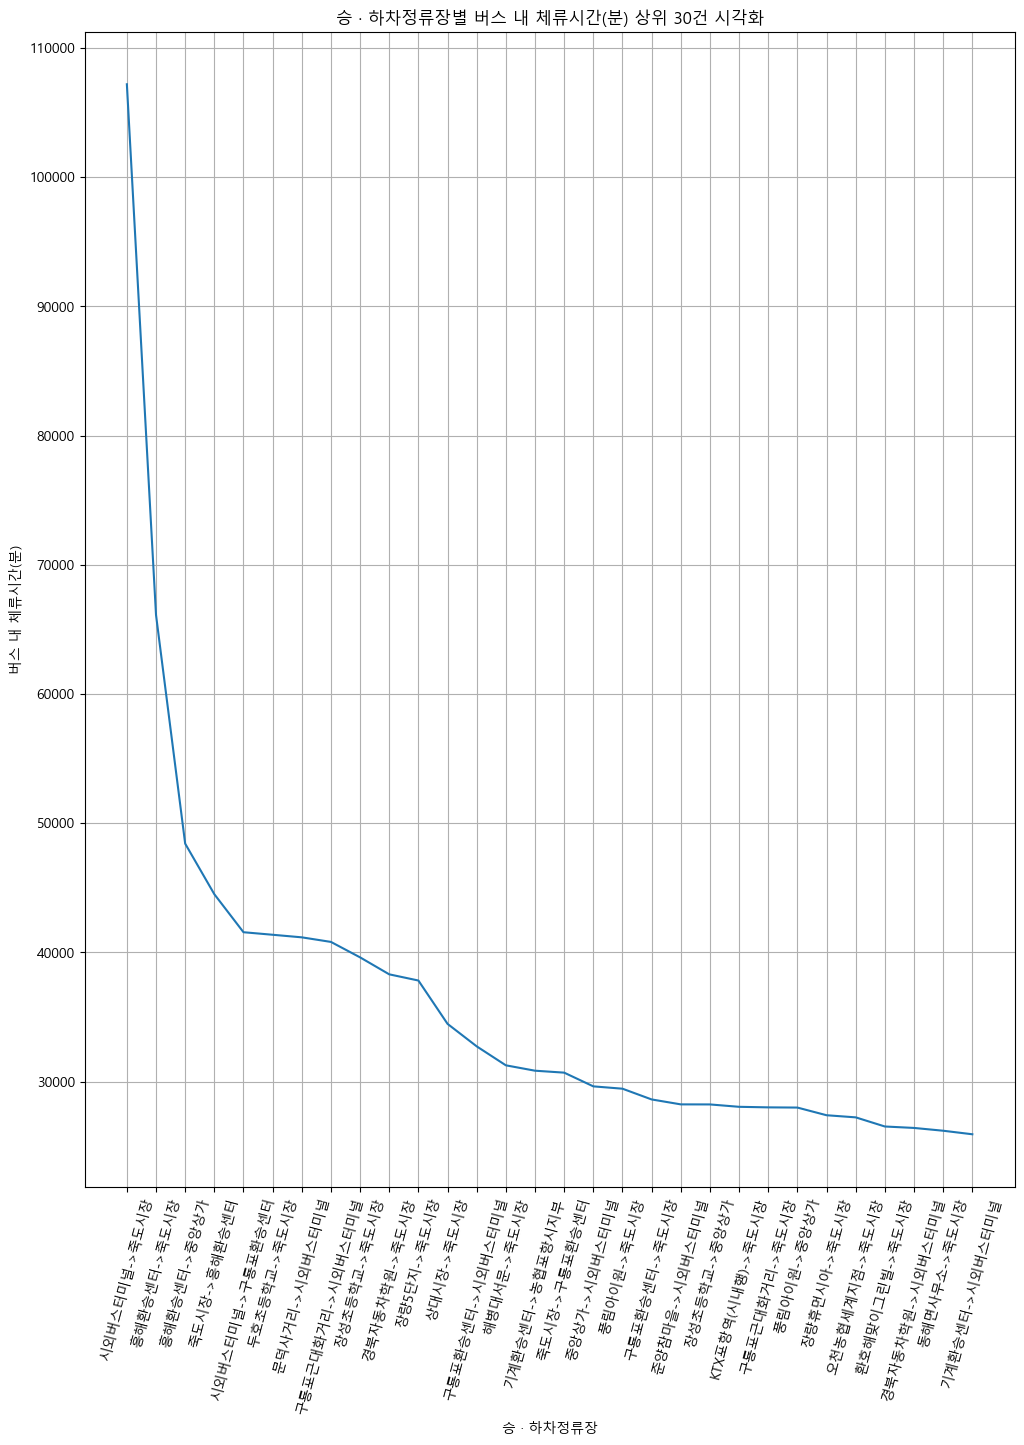

In [80]:
### 승 · 하차정류장 버스 내 체류시간(분) 상위 30건 시각화
# - plt.plot() 함수를 이용해서 선그래프로 시각화한다.

plt.figure(figsize=(12,15))
plt.title('승 · 하차정류장별 버스 내 체류시간(분) 상위 30건 시각화')
plt.plot(df_temp_sel['승 · 하차정류장'], df_temp_sel['버스 내 체류시간(분)'])

# x축의 label 문자열의 각도 조정
plt.xticks(rotation=75)

plt.xlabel('승 · 하차정류장')
plt.ylabel('버스 내 체류시간(분)')

plt.grid()

### 그래프를 파일로 저장하기
save_path = "./03_image/승 · 하차정류장별 버스 내 체류시간(분) 상위 30건.png"
plt.savefig(save_path, bbox_inches = 'tight')

plt.show();

#### 해석

- 전체 구간 중에 '시외버스터미널->죽도시장' 구간이 가장 많은 체류 시간을 보내고 있다

- 그 다음으로는 '흥해환승센터->죽도시장' 순으로 나타났다.

- 체류 시간이 많은 구간을 대상으로 시민 편의를 위하여 '급행 버스'도입의 필요성에 대한 인사이트를 도출하였다.